Comparar el perfil socio-económico (Ingreso per cápita mensual) de las personas que se encuentren en el rango de edades entre 25 y 60 años (inclusive), y:

G1) Su título más alto es de EEB (1° y 2° Ciclo) (6° grado);

G2) Posee título Universitario (superior universitario) o postgrado (especialización, maestría y doctorado).


In [1]:
import pandas as pd


In [20]:
df=pd.read_csv("/content/drive/MyDrive/probabilidad /Archivo de Datos.csv")#se abre la base de datos
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Departamento de residencia,AREA de Residencia,Edad,Sexo,Año de nacimiento,Estado civil,Ingreso mensual Ocupación Principal declarado,Ingreso mensual Ocupación Secundaria declarado,Ingreso mensual Otras Ocupaciones declarado,Ingreso mensual Alquileres o Rentas neto declarado,"Ingreso mensual Intereses, Dividendos o Utilidades declarado",Ingreso mensual Ayuda Familiar del país declarado,Ingreso mensual Prestaciones por divorcio O cuidado de hijos declarado,Ingreso mensual Jubilación declarado,Ingresos del Estado (Monetario: Tekopora) declarado,Ingreso mensual Pensión declarado,Ingresos del Estado (Monetario: Adulto Mayor) declarado,Ingresos por Víveres de alguna institución pública,Otros ingresos mensuales declarado,Idioma que habla en la casa la mayor parte del tiempo,¿Sabe leer y escibir?,Asiste o asistió a una institución de ens. educativa,Nivel y grado aprobado,Título o diploma que obtuvo,Asiste actualmente a una institución de enseñanza,Sector de la Institución donde asiste,Por qué no asiste o dejó de asistir,"Realizó algún curso no formal del país para trabajar, ejercer un oficio o mejorar nivel cultural",Qué tipo de curso fue el mas importante que hizo,Terminó este curso,En qué año terminó este curso,Qué institución dictó este curso que realizó,Nivel de instrucción del Padre,Nivel de instrucción de la Madre,Años de estudio,Ing por actividad principal corregido,Ing por actividad secundaria corregido,Ing por otras actividades corregido,Ing por alquileres o rentas netas,Ing por intereses o dividendos,Ing por ayuda familiar del país,Ing por divorcio o cuidado de hijos,Ing por jubilación,Ing del Estado Monetario Tekopora,Ing por pensión,Ing del Estado Monetario Adulto Mayor,Ing por víveres de alguna institución pública,Otros ingresos,Otros ingresos agro asignados al jefe,Ing por ayuda familiar del exterior 1,Ing por ayuda familiar del exterior 2,Ingreso percapita mensual,Estatus de pobreza,Condición de pobreza,Quintiles para el total país,Deciles para el total país,Quintiles para cada área,Deciles para cada área
0,DPTO,AREA,P02,P06,P08A,P09,E01A,E01B,E01C,E01D,E01E,E01F,E01G,E01H,E01I,E01J,E01K,E01L,E01M,ED01,ED02,ED03,ED0504,ED06C,ED08,ED09,ED10,ED12,ED13,ED14,ED14A,ED15,NPAD,NMAD,v1,E01AIMDE,E01BIMDE,E01CIMDE,E01DDE,E01EDE,E01FDE,E01GDE,E01HDE,E01IDE,E01JDE,E01KDE,E01LDE,E01MDE,E01KJDE,E02L1BDE,E02L2BDE,IPCM,POBREZAI,POBNOPOI,quintili,decili,quintiai,decilai
1,NaN,1,70,1,1946,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,3,1,1,2404,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,8888,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5578541.667,3,NaN,5,10,5,10
2,NaN,1,64,6,1952,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,606,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,8888,8888,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5578541.667,3,NaN,5,10,5,10
3,NaN,1,45,6,1971,5,6600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,2405,1,19,NaN,5,1,1,2014,6,3,2404,606,17,6600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5578541.667,3,NaN,5,10,5,10
4,NaN,1,36,6,1980,5,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,2405,1,19,NaN,5,1,1,2014,6,3,2404,606,17,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5578541.667,3,NaN,5,10,5,10


In [21]:
df.info()#se imprime los nombres de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37815 entries, 0 to 37814
Data columns (total 58 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Departamento de residencia                                                                         35206 non-null  object
 1   AREA de Residencia                                                                                 37815 non-null  object
 2   Edad                                                                                               37123 non-null  object
 3   Sexo                                                                                               37815 non-null  object
 4   Año de nacimiento                                                                                  37815 non-null  object
 5

In [22]:
df=df[["Edad","Título o diploma que obtuvo","Ingreso percapita mensual"]]#separamos solo las columnas que nos interesa
df.head()

,Edad,Título o diploma que obtuvo,Ingreso percapita mensual
0,P02,ED06C,IPCM
1,70,14,5578541.667
2,64,NaN,5578541.667
3,45,1,5578541.667
4,36,1,5578541.667


In [23]:
df=df.drop(index=0)#borramos las fila 1

In [24]:
df.head()

,Edad,Título o diploma que obtuvo,Ingreso percapita mensual
1,70,14,5578541.667
2,64,NaN,5578541.667
3,45,1,5578541.667
4,36,1,5578541.667
5,67,NaN,9500000


In [25]:
df.dtypes#imprimimos el tipo de variable que contiene cada columna 

Edad                           object
Título o diploma que obtuvo    object
Ingreso percapita mensual      object
dtype: object

In [26]:
df=df.dropna()#borramos las filas que contengan espacios vacios 
df["Edad"]=df["Edad"].astype(int)#convertimos la fila Edad de objeto a numerico entero

In [27]:
df.dtypes

Edad                            int64
Título o diploma que obtuvo    object
Ingreso percapita mensual      object
dtype: object

In [28]:
df=df[(df["Edad"]>=25) & (df["Edad"]<=60)]#aplicamos el primer filtro
df.head()

,Edad,Título o diploma que obtuvo,Ingreso percapita mensual
3,45,1,5578541.667
4,36,1,5578541.667
7,35,14,5937500
8,34,1,5937500
24,52,1,2804166.667


In [29]:
df["Título o diploma que obtuvo"]=df["Título o diploma que obtuvo"].astype(int)#convertimos la columna "Título o diploma que obtuvo" de objeto a numerico entero 
df.dtypes

Edad                            int64
Título o diploma que obtuvo     int64
Ingreso percapita mensual      object
dtype: object

In [30]:
G1=df[df["Título o diploma que obtuvo"]==3]#separamos el primer grupo por medio de un filtro
G1=G1["Ingreso percapita mensual"]#apartamos solo la columna que nos interesa 
G1

260       1004810.75
269          1684000
1145     347151.4025
1250       1527848.6
1417     5348788.912
            ...     
37270    1.20752e+06
37286    1.25944e+06
37373    1.89433e+06
37492         907122
37623         950000
Name: Ingreso percapita mensual, Length: 296, dtype: object

In [32]:
#G2=df[(df["Título o diploma que obtuvo"]>=8) & (df["Título o diploma que obtuvo"]<=10)]
G2=df[df["Título o diploma que obtuvo"].between(8,10)]#separamos el segundo grupo por medio de dos filtros
G22=df[df["Título o diploma que obtuvo"]==1]
G2=pd.concat([G2,G22],axis=0)#unimos los dos filtro aplicados 
G2=G2["Ingreso percapita mensual"]
G2

200      3979366.848
211      5255381.356
724      14270676.69
733      4373929.141
909          7735500
            ...     
37789    4.86073e+06
37799     2.0957e+06
37800     2.0957e+06
37804    1.68212e+06
37809       4.75e+06
Name: Ingreso percapita mensual, Length: 1510, dtype: object

In [33]:
G1=G1.astype(float)#hacemos que la unica columna de esta variable sea flotante

In [ ]:
print("Grupo 1:")#imprimimos los datos estadisticos
print(f"Cantidad: {G1.count()}")
print(f"Media: {G1.mean()}")
print(f"Maximo: {G1.max()}")
print(f"Minimo: {G1.min()}")
print(f"Rango: {G1.max()-G1.min()}")
print(f"Desv Estandar: {G1.std()}")

In [34]:
G2=G2.astype(float)

In [35]:
print("Grupo 1:")
print(f"Cantidad: {G2.count()}")
print(f"Media: {G2.mean()}")
print(f"Maximo: {G2.max()}")
print(f"Minimo: {G2.min()}")
print(f"Rango: {G2.max()-G2.min()}")
print(f"Desv Estandar: {G2.std()}")

Grupo 1:
Cantidad: 1510
Media: 3321965.6871535117
Maximo: 32491666.67
Minimo: 304829.3333
Rango: 32186837.336700004
Desv Estandar: 3376603.991328809


In [36]:
GT=pd.concat([G1.rename("G1"),G2.rename("G2")],axis=1)#unimos ambos grupos en una sola varible, una al lado de otra
GT.head()

,G1,G2
3,NaN,5578541.667
4,NaN,5578541.667
8,NaN,5937500.000
24,NaN,2804166.667
25,NaN,2804166.667


In [37]:
intervalos=pd.interval_range(start=0,end=GT.max().max()+2000000, freq=2000000,closed="left")#generamos los intervalos de clases
for inter in intervalos:
  print(inter)

[0.0, 2000000.0)
[2000000.0, 4000000.0)
[4000000.0, 6000000.0)
[6000000.0, 8000000.0)
[8000000.0, 10000000.0)
[10000000.0, 12000000.0)
[12000000.0, 14000000.0)
[14000000.0, 16000000.0)
[16000000.0, 18000000.0)
[18000000.0, 20000000.0)
[20000000.0, 22000000.0)
[22000000.0, 24000000.0)
[24000000.0, 26000000.0)
[26000000.0, 28000000.0)
[28000000.0, 30000000.0)
[30000000.0, 32000000.0)
[32000000.0, 34000000.0)


In [39]:
F1=pd.cut(GT["G1"],bins=intervalos).rename("G1")#identificamos a que intervalo pertenece cada dato
F2=pd.cut(GT["G2"],bins=intervalos).rename("G2")
F1=F1.groupby(F1).count()#identificamos la frecuencia de cada clase
F2=F2.groupby(F2).count()
FT=pd.concat([F1,F2],axis=1)#concatenamos una frecuencia al lado de otra
FT

,G1,G2
"[0.0, 2000000.0)",211,622
"[2000000.0, 4000000.0)",67,538
"[4000000.0, 6000000.0)",15,179
"[6000000.0, 8000000.0)",1,81
"[8000000.0, 10000000.0)",0,23
"[10000000.0, 12000000.0)",0,22
"[12000000.0, 14000000.0)",0,16
"[14000000.0, 16000000.0)",1,8
"[16000000.0, 18000000.0)",1,3
"[18000000.0, 20000000.0)",0,5


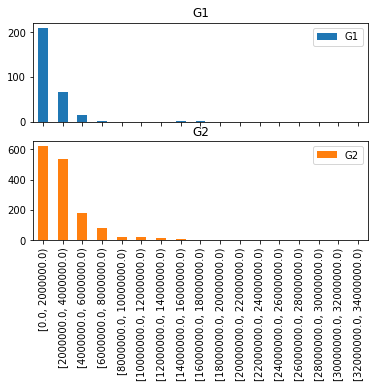

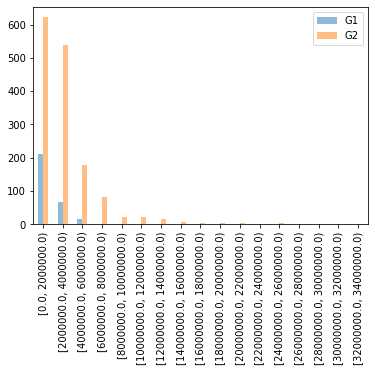

In [40]:
import matplotlib.pyplot as plt#importamos la libreria que nos permite graficar
FT.plot(kind="bar",subplots=True)#graficamos cada clase por separado
FT.plot(kind="bar",alpha=0.5)#graficamos todas clase juntas
plt.show()